# Sentiment Analysis of Blog Posts


### Project Objective: -
### 1. Perform sentiment analysis to understand the general sentiment expressed in the blog posts.
### 2. Build a text classification model to categorize the blog posts.


## Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Load dataset

In [ ]:
df = pd.read_csv('blogs.csv.xls')
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


## EDA

#### 1. Initial EDA

In [ ]:
df['Labels'].value_counts()

,count
Labels,
alt.atheism,100
comp.graphics,100
comp.os.ms-windows.misc,100
comp.sys.ibm.pc.hardware,100
comp.sys.mac.hardware,100
comp.windows.x,100
misc.forsale,100
rec.autos,100
rec.motorcycles,100


In [ ]:
# We can see that there are multiple labels for blog posts each with a count of 100 instances.

In [ ]:
df.isna().sum()

,0
Data,0
Labels,0


In [ ]:
# There are no null/missing values in the dataset.

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# There are no duplicate records in the dataset.

#### 2. Text Cleaning

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
lemma = WordNetLemmatizer()

In [ ]:
def clean_text(text):
  text = re.sub('[^a-zA-Z]', ' ', text) # Remove non-alphanumeric characters
  text = text.lower() # Convert to lowercase
  text = text.split() # Tokenize
  text = [lemma.lemmatize(word) for word in text if word not in stopwords.words('english')] # Lemmatize and remove stopwords
  text = ' '.join(text) # Join the words back into a string
  return text

In [ ]:
df['cleaned_text'] = df['Data'].apply(clean_text)
df

,Data,Labels,cleaned_text
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupe srv c cmu edu magnesium club c...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroups alt atheism path cantaloupe srv c c...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,path cantaloupe srv c cmu edu da news harvard ...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupe srv c cmu edu magnesium club c...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,xref cantaloupe srv c cmu edu alt atheism talk...
...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,xref cantaloupe srv c cmu edu talk abortion al...
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,xref cantaloupe srv c cmu edu talk religion mi...
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,xref cantaloupe srv c cmu edu talk origin talk...
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,xref cantaloupe srv c cmu edu talk religion mi...


In [ ]:
# Remove redundant feature -> 'Data'

df.drop(columns=['Data'], inplace=True)

In [ ]:
df.head()

,Labels,cleaned_text
0,alt.atheism,path cantaloupe srv c cmu edu magnesium club c...
1,alt.atheism,newsgroups alt atheism path cantaloupe srv c c...
2,alt.atheism,path cantaloupe srv c cmu edu da news harvard ...
3,alt.atheism,path cantaloupe srv c cmu edu magnesium club c...
4,alt.atheism,xref cantaloupe srv c cmu edu alt atheism talk...


#### 3. Word Cloud and N-grams

In [ ]:
txt = ' '.join(df['cleaned_text'])
txt

'path cantaloupe srv c cmu edu magnesium club cc cmu edu news sei cmu edu ci ohio state edu zaphod mp ohio state edu howland reston an net agate doc ic ac uk uknet mcsun germany eu net thoth mchp sni de horus ap mchp sni de frank frank uucp frank dwyer newsgroups alt atheism subject islamic genocide date apr gmt organization siemens nixdorf ag line distribution world message id r vej k horus ap mchp sni de reference r qe fido asd sgi com r ubl bd horus ap mchp sni de r ek uo fido asd sgi com nntp posting host ap mchp sni de article r ek uo fido asd sgi com livesey solntze wpd sgi com jon livesey writes article r ubl bd horus ap mchp sni de frank uucp frank dwyer writes article r qe fido asd sgi com livesey solntze wpd sgi com jon livesey writes noting particular society case mainland uk religously motivated murder murder kind say little whether inter religion murder elsewhere religiously motivated allows one conclude nothing inherent religion matter catholicism protestantism motivates 

(np.float64(-0.5), np.float64(1999.5), np.float64(999.5), np.float64(-0.5))

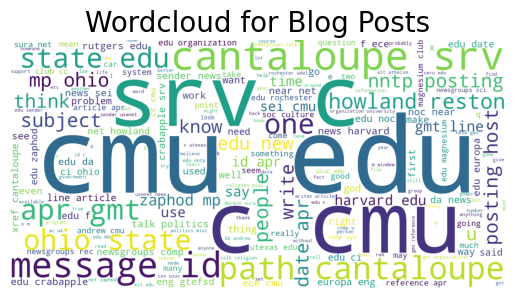

In [ ]:
wc = WordCloud(background_color = 'white', height = 1000, width = 2000).generate(txt)

plt.title('Wordcloud for Blog Posts', size=20)
plt.imshow(wc)
plt.axis('off')

In [ ]:
# Applying N-grams technique to get frequency of top 20 most occuring words

def plot_ngrams(df, n=1):
  vectorizer = CountVectorizer(ngram_range=(n, n))
  ngrams = vectorizer.fit_transform(df['cleaned_text'])
  ngrams_freq = ngrams.sum(axis=0).A1 # .A1 attribute converts the matrix obtained in the previous step into a 1-dimensional NumPy array. This makes it easier to work with the frequency data.
  ngrams_df = pd.DataFrame(ngrams_freq, index=vectorizer.get_feature_names_out(), columns=['Frequency'])
  ngrams_df = ngrams_df.sort_values(by='Frequency', ascending=False)
  ngrams_df = ngrams_df.head(20)


  plt.figure(figsize=(15,10))
  sns.barplot(x='Frequency', y=ngrams_df.index, data=ngrams_df, palette='viridis')
  plt.title(f'Top 20 {n}-grams')
  plt.show()

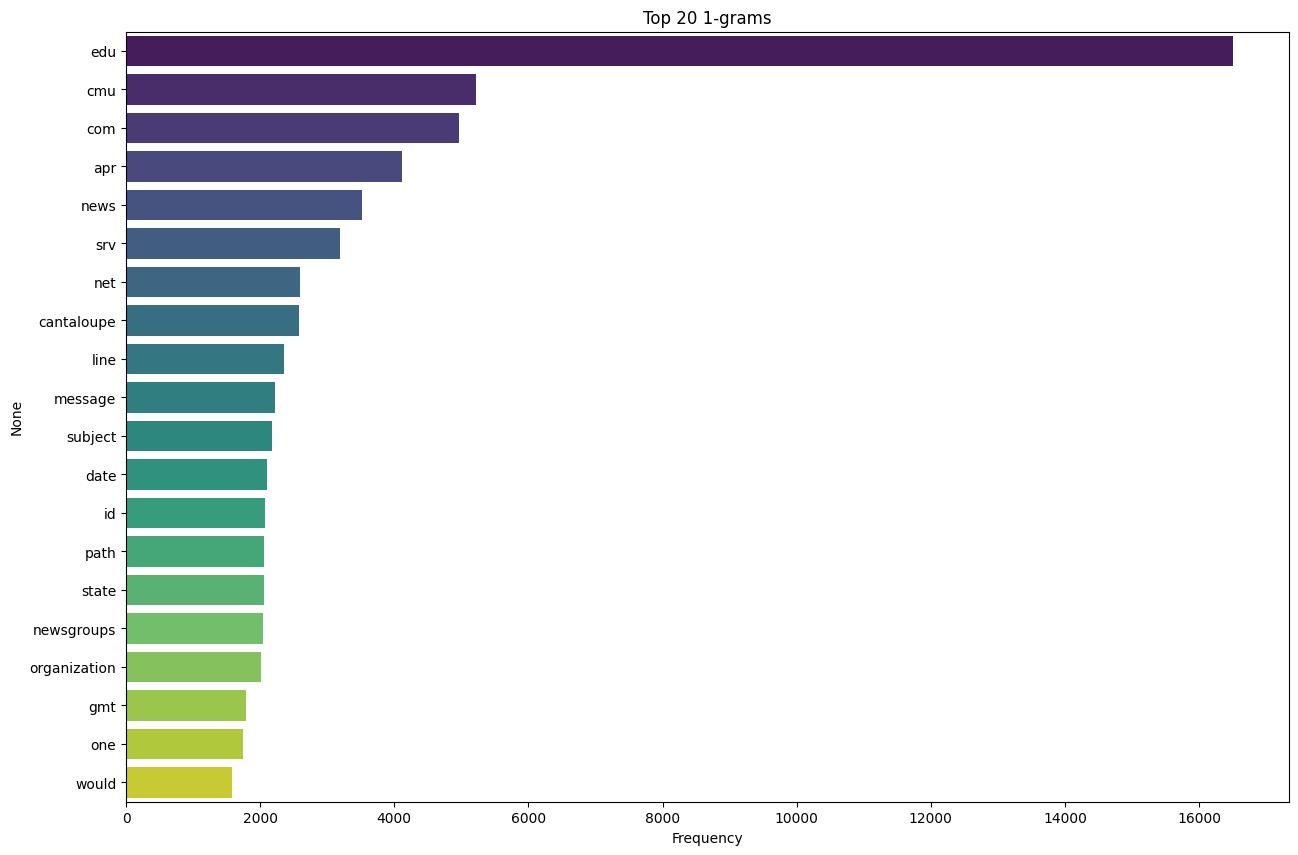

In [ ]:
# Unigrams
plot_ngrams(df, n=1)

In [ ]:
# From word cloud and unigram plots, we can clearly see that 'edu', 'cmu' and 'com' are the most frequently used words in the blogs,
# with 'edu' having the highest frequency surpassing other tokens by a large margin.

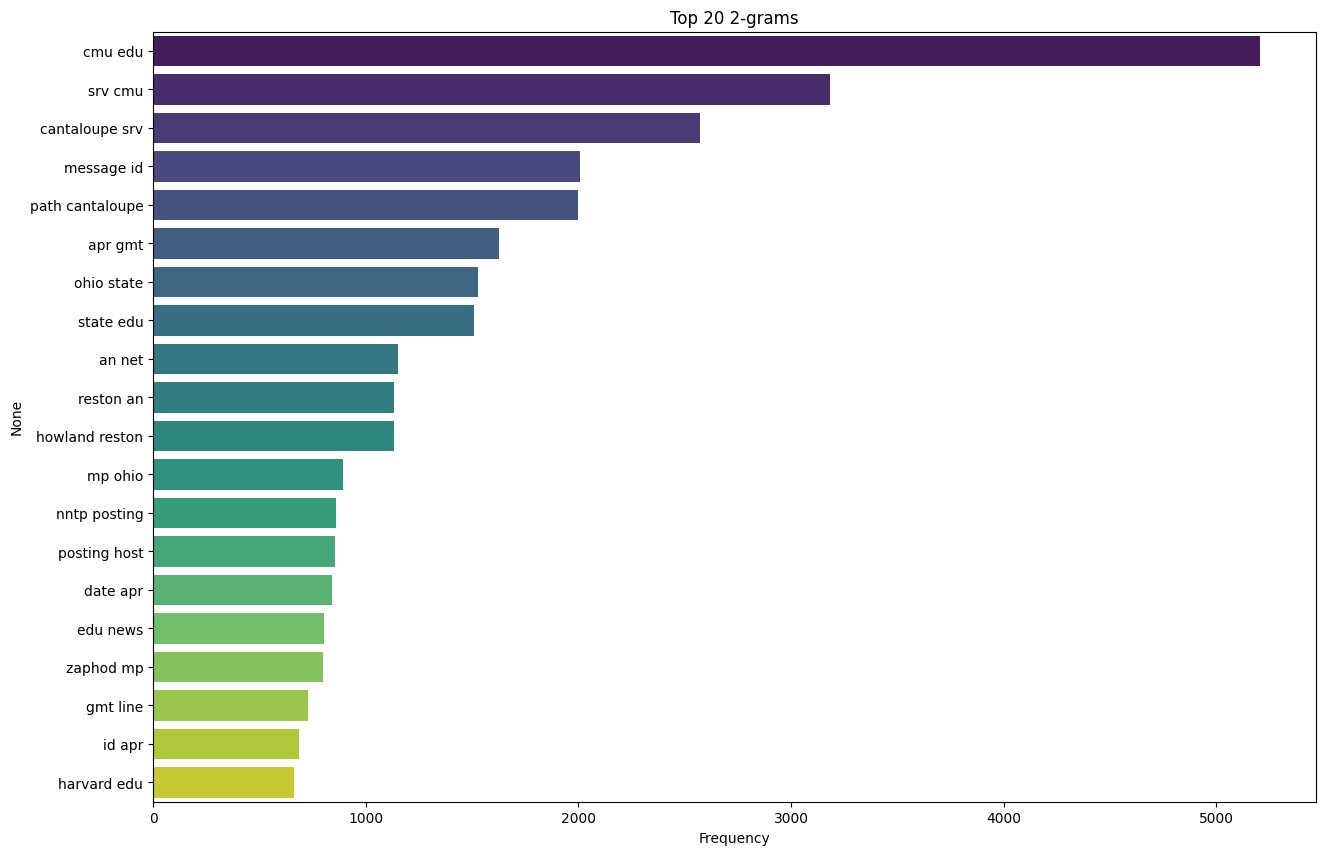

In [ ]:
# Bigrams
plot_ngrams(df, n=2)

In [ ]:
# From the above Bi-gram plot, we can see that 'cmu-edu' and 'srv-cmu' are the most fequently occuring word associations containing 2 words.

#### 4. Sentiment Distribution Analysis

In [ ]:
# Import libraries for sentiment analysis

from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
def analyze_sentiment(Data):
  scores = analyzer.polarity_scores(Data)
  if scores['compound'] >= 0.05:
    return 'Positive'
  elif scores['compound'] <= -0.05:
    return 'Negative'
  else:
    return 'Neutral'

In [ ]:
df['Sentiment'] = df['cleaned_text'].apply(analyze_sentiment)
df

,Labels,cleaned_text,Sentiment
0,alt.atheism,path cantaloupe srv c cmu edu magnesium club c...,Negative
1,alt.atheism,newsgroups alt atheism path cantaloupe srv c c...,Positive
2,alt.atheism,path cantaloupe srv c cmu edu da news harvard ...,Negative
3,alt.atheism,path cantaloupe srv c cmu edu magnesium club c...,Negative
4,alt.atheism,xref cantaloupe srv c cmu edu alt atheism talk...,Positive
...,...,...,...
1995,talk.religion.misc,xref cantaloupe srv c cmu edu talk abortion al...,Positive
1996,talk.religion.misc,xref cantaloupe srv c cmu edu talk religion mi...,Positive
1997,talk.religion.misc,xref cantaloupe srv c cmu edu talk origin talk...,Positive
1998,talk.religion.misc,xref cantaloupe srv c cmu edu talk religion mi...,Positive


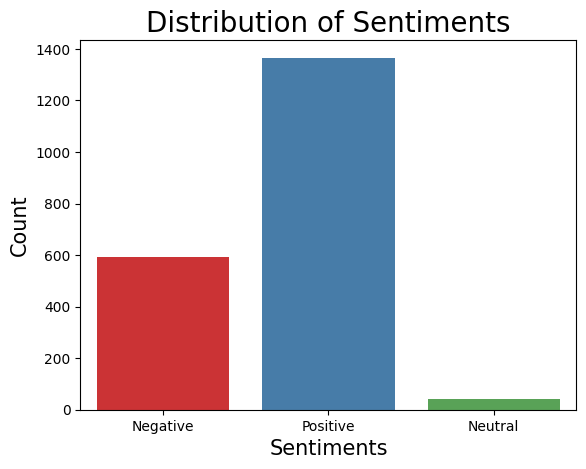

,count
Sentiment,
Positive,1366
Negative,591
Neutral,43


In [ ]:
# Visualize sentiment distribution

sns.countplot(x='Sentiment', data=df, palette='Set1')
plt.title('Distribution of Sentiments', size=20)
plt.xlabel('Sentiments', size=15)
plt.ylabel('Count', size=15)
plt.show()

df['Sentiment'].value_counts()

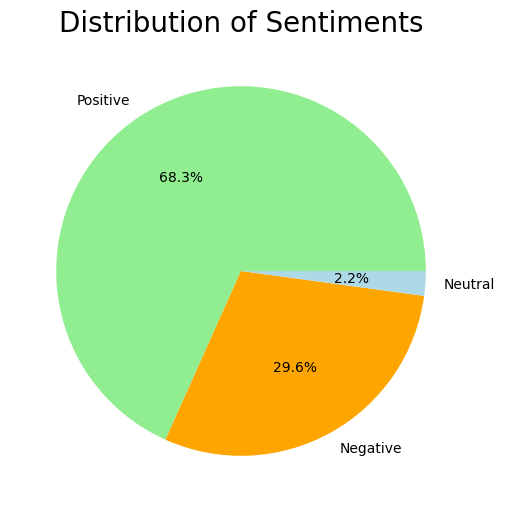

In [ ]:
# Visualizing sentiments using Pie chart

df['Sentiment'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6), colors=['lightgreen','orange','lightblue'])
plt.title('Distribution of Sentiments', size=20)
plt.ylabel('')
plt.show()

### Inference on Sentiment Analysis of Blog Posts:

1. Positive: 68.3% of the blog posts express a positive sentiment. This suggests a generally optimistic or favorable tone in the majority of the blogs.
2. Negative: 29.6% of the blog posts express a negative sentiment. This indicates a significant presence of critical or unfavorable viewpoints within the blogosphere.
3. Neutral: 2.2% of the blog posts are classified as neutral. This implies that most blogs have a clear positive or negative sentiment, with relatively few expressing a neutral stance.

##### Overall Sentiment: While there is a notable presence of negative sentiment, the overall tone of the blog posts leans towards positivity, with positive sentiment dominating the distribution. This could indicate a generally optimistic or favorable outlook within the blogosphere.

Potential Implications:

1. Brand perception: For businesses or organizations mentioned in the blogs, the positive sentiment suggests a generally favorable perception. However, it's crucial to address the negative sentiment and understand the concerns or criticisms raised.
2. Content strategy: Bloggers and content creators can leverage this information to tailor their content to resonate with the prevailing positive sentiment. Addressing negative feedback and incorporating diverse perspectives can further enhance engagement and credibility.
3. Market research: The sentiment analysis provides insights into public opinion and attitudes towards the topics discussed in the blogs. This information can be valuable for market research and understanding consumer preferences.

## Feature Extraction using TF-IDF

In [ ]:
y=df['Sentiment']
y

,Sentiment
0,Negative
1,Positive
2,Negative
3,Negative
4,Positive
...,...
1995,Positive
1996,Positive
1997,Positive
1998,Positive


In [ ]:
# Create TF-IDF features
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(df['cleaned_text']).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
x.shape, y.shape

((2000, 34494), (2000,))

In [ ]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,34484,34485,34486,34487,34488,34489,34490,34491,34492,34493
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# By applying TF-IDF after text cleaning, we create a numerical representation of the text data that captures the importance of
# each word. This representation can then be used for various downstream tasks, such as text classification, clustering, or topic modeling.

## Model Building

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Initialize and train models

models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': MultinomialNB()
}

for name, model in models.items():
    model.fit(x_train, y_train)
    print(f'{name} trained.')

Logistic Regression trained.
SVM trained.
Random Forest trained.
Naive Bayes trained.


## Model Evaluation

In [ ]:
# Comparing metrics like Accuracy, so that we can gain insights into the strengths and weaknesses of each model
# and select the one that provides the most accurate and reliable predictions.

In [ ]:
results = []

for name, model in models.items():
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append([name, accuracy])

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy'])

In [ ]:
print('\n Model Evaluation Result:')
print(results_df)


 Model Evaluation Result:
                 Model  Accuracy
0  Logistic Regression    0.7775
1                  SVM    0.7650
2        Random Forest    0.7775
3          Naive Bayes    0.7025


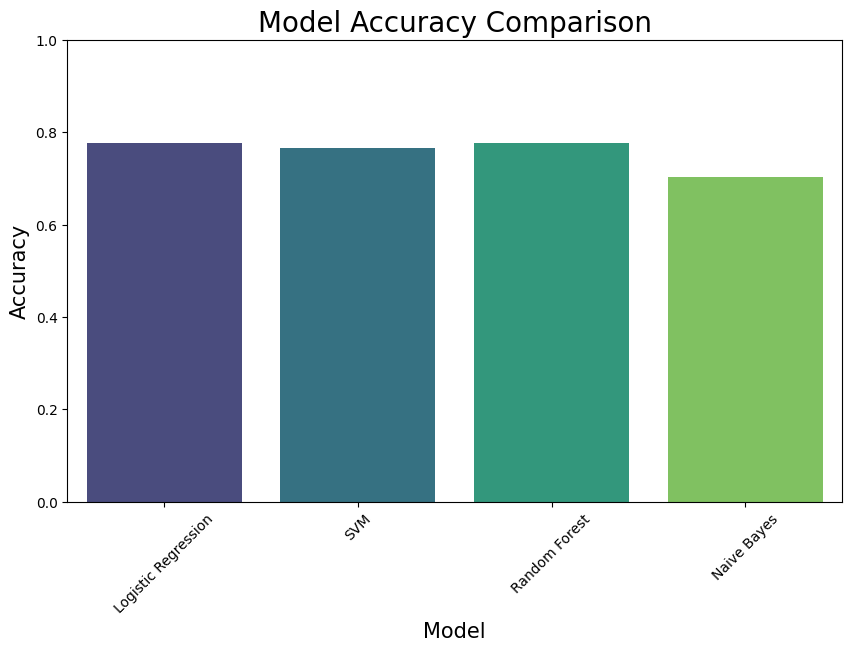

In [ ]:
# Create a bar plot to visualize accuracy scores of different models

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison', size=20)
plt.xlabel('Model', size=15)
plt.ylabel('Accuracy', size=15)
plt.xticks(rotation=45)
plt.ylim(0,1) # Set y-axis limits to range from 0-1 for accuracy
plt.show()

### Inference: It is clear from above plot that 'Logistic Regression' is the best suited model for our business case based on its higher accuracy than other models in the current study. Random Forest model also gave a similar accuracy result but Logistic Regression is more computationally easier to implement.

In [78]:
# Therefore, printing classification report for Logistic Regression model.

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.88      0.32      0.47       111
     Neutral       0.00      0.00      0.00         9
    Positive       0.77      0.98      0.86       280

    accuracy                           0.78       400
   macro avg       0.55      0.44      0.44       400
weighted avg       0.78      0.78      0.73       400



In [79]:
# We achieved 0.78 (78%) accuracy for sentiment classification using Logistic Regression model with high precision, recall and f1-scores
# for positive sentiments and high precision and an average f1-score for negative sentiments which shows we achieved a decent model for
# text classification of blog posts.

### Inference on Sentiment Classification Model:

##### In the context of blog post sentiment classification, 0.78 accuracy can be considered a reasonable starting point but has room for improvement. Here's a breakdown of why:

Challenges specific to blog posts:

1. Informal Language: Blog posts often use casual language, slang, and abbreviations, which can make sentiment analysis more difficult.
2. Subjectivity and Nuance: Bloggers express opinions and emotions in diverse ways, making it challenging to capture subtle sentiment cues.
3. Sarcasm and Irony: Blog posts may contain sarcasm or irony, which can easily be misclassified by sentiment analysis models.
4. Domain-Specific Language: Blog posts on specific topics might have unique vocabulary or expressions that models trained on general text might not recognize.

Considering these challenges, 0.78 accuracy is a decent starting point, but could potentially be aimed for higher accuracy.

